In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10, 5)
import pandas as pd

## Linear Regression

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

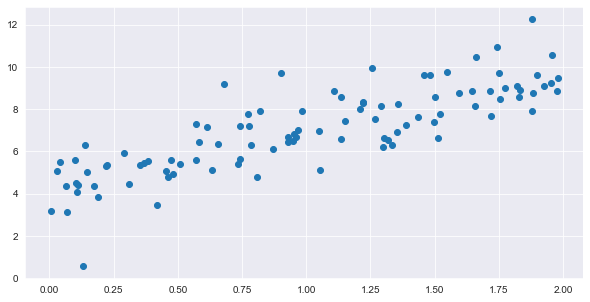

In [8]:
plt.plot(X, y, marker='o', ls='')

In [9]:
# We add a 1 as our intercept first
X_b = np.c_[np.ones((100, 1)), X]

# Compute theta
theta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_hat

array([[4.25509853],
       [2.75140848]])

In [18]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_hat)
print(y_predict)

[[4.25509853]
 [9.75791549]]


In [19]:
y_predict = X_b.dot(theta_hat)

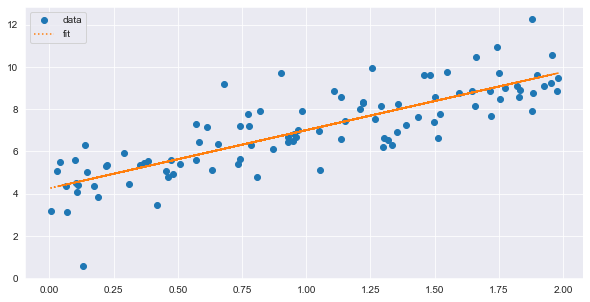

In [33]:
plt.plot(X, y, marker='o', ls='', label='data')
plt.plot(X_b[:,1], y_predict, ls=':', label='fit')
plt.legend(loc='upper left')

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

[4.25509853] [[2.75140848]]


## Gradient Descent

In [45]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)
theta_diff = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    prev_theta = theta
    theta = theta - eta * gradients
    diff = theta - prev_theta
    theta_diff.append(diff[1])

In [40]:
theta

array([[4.25509853],
       [2.75140848]])

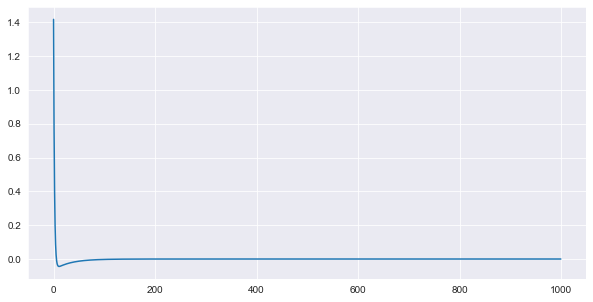

In [46]:
plt.plot(theta_diff)

## Stochastic Gradient Descent

In [124]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2, 1)
eta_list = []
gradients_list = []
theta_list = []
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2/m * xi.T.dot(xi.dot(theta) - yi)
        gradients_list.append(gradients)
        eta = learning_schedule(epoch * m + i)
        eta_list.append(eta)
        theta = theta - eta * gradients
        theta_list.append(theta)

print(theta)

[[3.31109571]
 [1.09396343]]


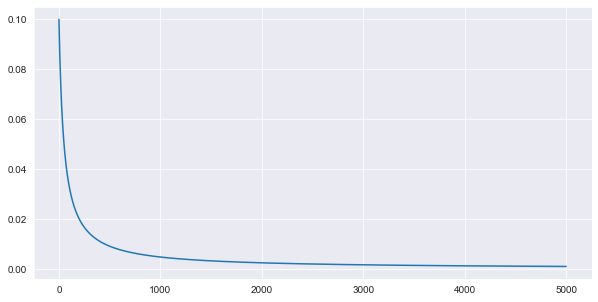

In [123]:
plt.plot(eta_list)


In [107]:
x = list(range(5000))
intercepts = [gradients_list[i][0][0] for i in range(5000)]
slope = [gradients_list[i][1][0] for i in range(5000)]

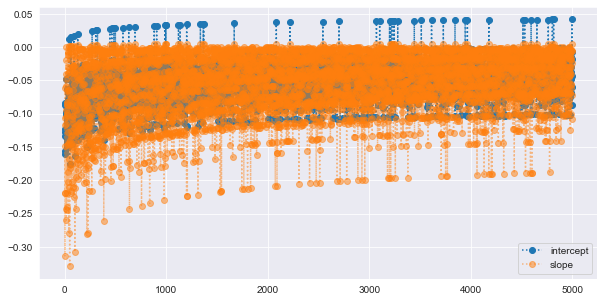

In [120]:
plt.plot(x, intercepts, marker='o', ls=':', label='intercept')
plt.plot(x, slope, marker='o', ls=":", alpha=0.5, label='slope')
plt.legend()

In [121]:
gradients

array([[-0.0862126 ],
       [-0.10830945]])

In [129]:
len(theta_list)

5000

In [133]:
theta_intercept = [theta_list[i][0][0] for i in range(5000)]
theta_slope = [theta_list[i][1][0] for i in range(5000)]

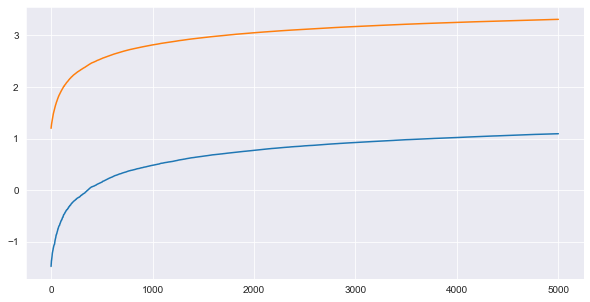

In [134]:
plt.plot(x, theta_slope, label='slope')
plt.plot(x, theta_intercept, label='intercept')

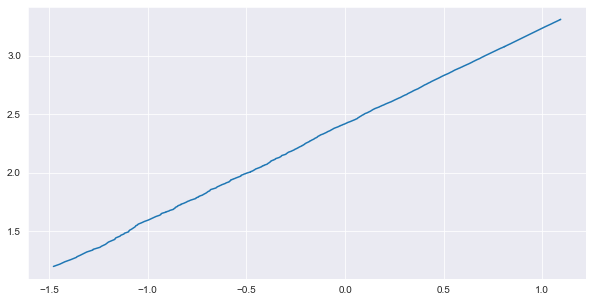

In [136]:
plt.plot(theta_slope, theta_intercept)

## Polynomial Regression

In [3]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

Text(0, 0.5, 'y')

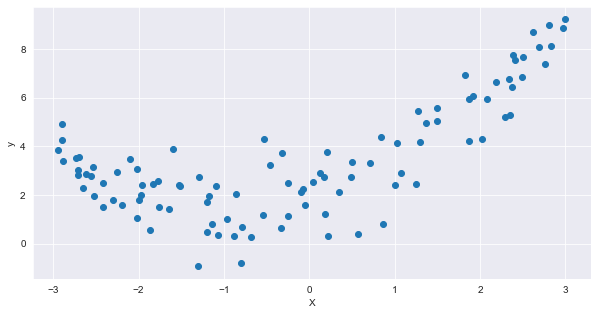

In [5]:
plt.plot(X, y, marker='o', ls='')
plt.xlabel('X')
plt.ylabel('y')

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [8]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_poly = pf.fit_transform(X)

In [10]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [27]:
X_pred = lin_reg.predict(X_poly)

Text(0, 0.5, 'y')

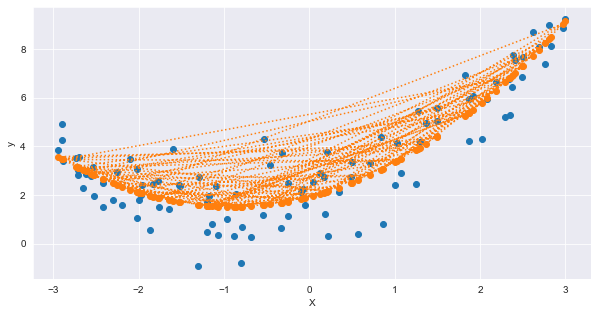

In [28]:
plt.plot(X, y, marker='o', ls='')
plt.plot(X, X_pred, marker='o', ls=':')
plt.xlabel('X')
plt.ylabel('y')

In [34]:
lin_reg.intercept_[0], lin_reg.coef_[0]

(1.9239817613542773, array([0.90812099, 0.49883774]))

In [40]:
degrees = [2, 3, 5, 10]
result = {}
for d in degrees: 
    pf = PolynomialFeatures(degree=d, include_bias=False)
    X_poly = pf.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    result['degree'] = d
    result['intercept'] = lin_reg.intercept_[0]
    result['coefficients'] = lin_reg.coef_

In [42]:
result

{'degree': 10,
 'intercept': 2.2218946136039177,
 'coefficients': array([[ 0.6401272 , -1.19435842,  0.51839988,  1.55680745, -0.21481647,
         -0.49034778,  0.03278437,  0.06225031, -0.0016876 , -0.00274392]])}

### Learning Curves

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [69]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel('Training Set size')
    plt.ylim([0, 3])
    plt.ylabel('RMSE')
    plt.legend()

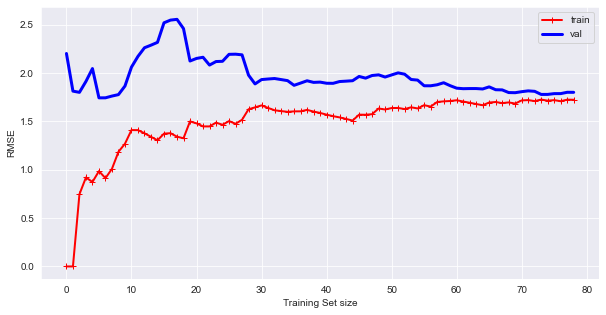

In [64]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [65]:
from sklearn.pipeline import Pipeline

In [73]:
polynomial_regression = Pipeline([
                              ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                              ("lin_reg", LinearRegression()),])

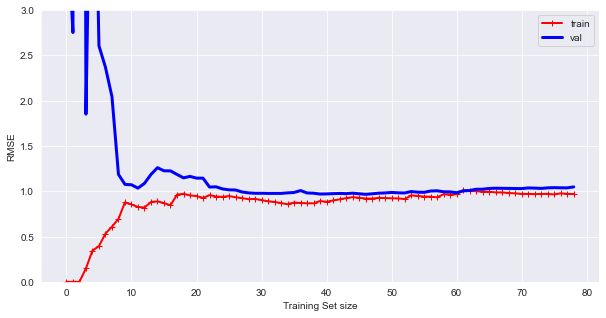

In [74]:
plot_learning_curves(polynomial_regression, X, y)

## Logistic Regression

In [75]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [77]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

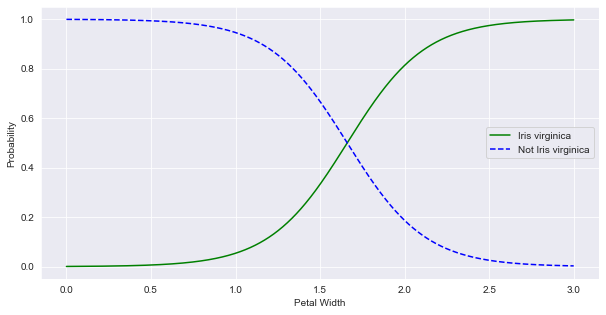

In [85]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")
plt.xlabel('Petal Width')
plt.ylabel('Probability')
plt.legend()

In [91]:
log_reg.coef_

array([[4.3330846]])

In [96]:
log_reg.predict([[1.7], [1.5], [1.8]])

array([1, 0, 1])